In [ ]:
import nltk
import numpy as np
import pandas as pd
from nltk import ngrams
from nltk.probability import FreqDist
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 1: Load the data
data = pd.read_csv('/content/drive/MyDrive/datasets/nlp/ca1/google_play_store_apps_reviews.csv')

# Step 2: Split the data
train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 42)

In [ ]:
# Step 3: Build the n-gram Language Model
def get_ngrams(text, n):
    tokens = nltk.word_tokenize(text)
    return list(ngrams(tokens, n))

def train_ngram(data, n):
    positive_ngrams = []
    negative_ngrams = []

    for index, row in data.iterrows():
        grams = get_ngrams(row['review'], n)
        if row['polarity'] == 1:
            positive_ngrams.extend(grams)
        elif row['polarity'] == 0:
            negative_ngrams.extend(grams)

    positive_freq = FreqDist(positive_ngrams)
    negative_freq = FreqDist(negative_ngrams)

    return positive_freq, negative_freq

# Step 4: Train the Model
n = 2  # Change to the desired n-gram size
positive_freq, negative_freq = train_ngram(train_data, n)

In [ ]:
# Step 5: test the n-gram
def test_ngram(data, positive_freq, negative_freq, n):
  pred_labels = []

  # Implement testing n-gram language model process here.
  for index, row in data.iterrows():
    grams = get_ngrams(row['review'], n)
    pos_score = 0
    neg_score = 0
    for gram in grams:
        pos_score += positive_freq[gram]
        neg_score += negative_freq[gram]
    pred_labels.append(1 if pos_score >= neg_score else 0)

  return pred_labels



Model accuracy: 77.65%
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       126
           1       0.93      0.26      0.41        53

    accuracy                           0.78       179
   macro avg       0.85      0.63      0.64       179
weighted avg       0.81      0.78      0.73       179



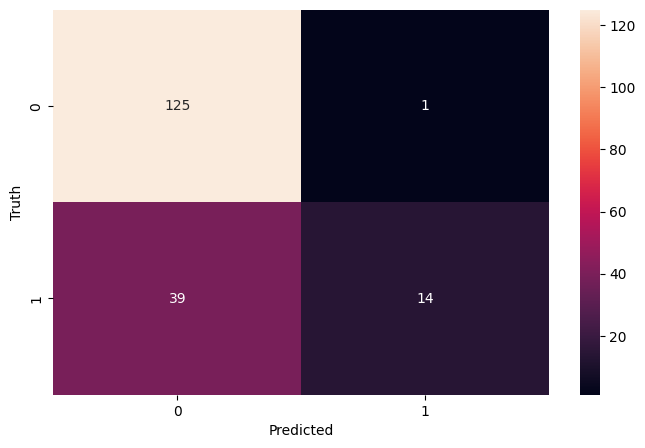

In [ ]:
# Step 6: Evaluate the model on the test set

# Implement the evaluation process here.
def evaluate_model(test_data, pred_labels):
    true_labels = test_data['polarity'].tolist()
    accuracy = accuracy_score(true_labels, pred_labels)
    return accuracy

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

pred_labels = test_ngram(test_data,positive_freq,negative_freq,n)
accuracy = evaluate_model(test_data, pred_labels)
print(f"Model accuracy: {accuracy*100:.2f}%")
print(classification_report(test_data['polarity'].tolist(), pred_labels))

cm = confusion_matrix(test_data['polarity'].tolist(), pred_labels)

# Plot using seaborn
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()